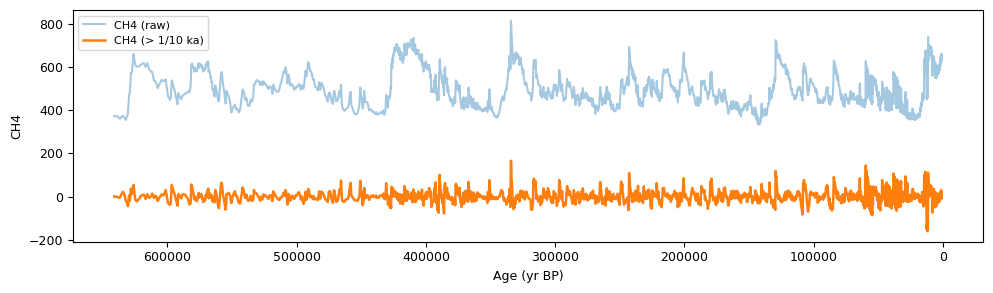

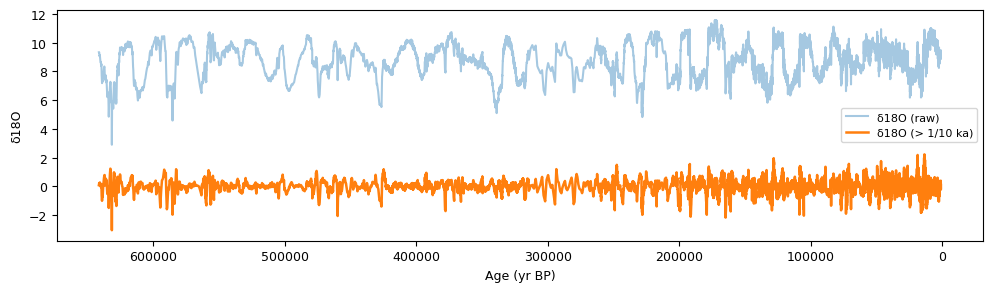

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


# 0) Load raw data
df_ch4 = pd.read_excel('other_data/CH4_AICC2023.xlsx', sheet_name='Sheet1')
file_path = r"D:\VScode\bipolar_seesaw_CCM\other_data\monsoon.xlsx"
df_d18O = pd.read_excel(file_path)
df_d18O['age'] *= 1000  # to yrs BP
df_d18O['d18O'] = df_d18O['d18O'].values*-1
# renmae column d18O to 'd18O*-1'
df_d18O.rename(columns={'d18O': '-d18O'}, inplace=True)

dt=10
# 1) Build common 10-yr age grid over their overlap
age_min = 1000 # max(df_ch4['age'].min(), df_d18O['age'].min())
age_max = min(df_ch4['age'].max(), df_d18O['age'].max())
ages = np.arange(age_min, age_max + 1, dt)

# 2) Interpolate each onto that grid
ch4 = np.interp(ages, df_ch4['age'], df_ch4['ch4'])
d18O = np.interp(ages, df_d18O['age'], df_d18O['-d18O'])



df_ch4_interp = pd.DataFrame({'age':ages, 'ch4':ch4})
df_d18O_interp = pd.DataFrame({'age':ages, 'd18O':d18O})

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = True             # quick comparison plot
)




# df_filt_ch4, df_filt_d18O = sa.bandpass_ch4_d18o(
#     df_ch4_interp,
#     df_d18O_interp,
#     low_period = 100,     # keep variability slower than 300 yr
#     high_period = 10_000,  # and faster than 3 ka
#     flip_sign = False,
#     plot = True
# )



# Diff age analysis

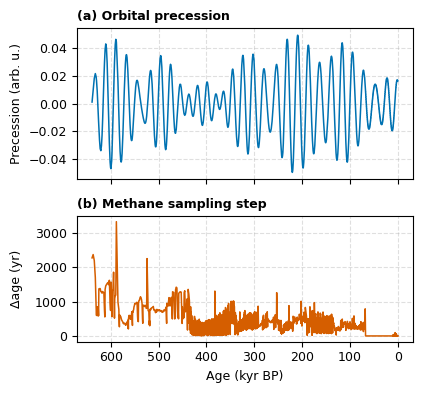

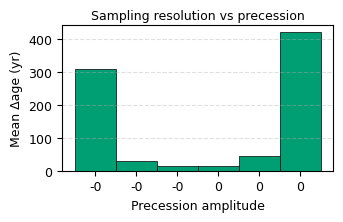

In [49]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

fig_pair, fig_bar = sa.age_gap_ana(
    df_ch4,
    age_min=0,
    age_max=640_000,
    pre_path=r"D:\VScode\bipolar_seesaw_CCM\inso_data\pre_800_inter100.txt",
    n_bins=6,
    tolerance=200
)



# TE dT plot

     dt     te_xy    p_xy     te_yx    p_yx  sig_uni
0    10  0.000618  0.0000  0.000129  0.5901     True
1    20  0.000974  0.0000  0.000276  0.5244     True
2    30  0.001204  0.0005  0.000430  0.4763     True
3    40  0.001516  0.0017  0.000521  0.5808     True
4    50  0.001680  0.0043  0.000601  0.6573     True
5    60  0.001629  0.0386  0.000940  0.3993     True
6    70  0.002054  0.0177  0.000824  0.5606     True
7    80  0.002702  0.0047  0.001015  0.4874     True
8    90  0.002002  0.1151  0.001835  0.1120    False
9   100  0.003096  0.0116  0.001720  0.2317     True
10  110  0.003046  0.0275  0.001973  0.2007     True
11  120  0.002527  0.1662  0.002484  0.1073    False
12  130  0.003137  0.0718  0.002758  0.0953    False
13  140  0.003315  0.0879  0.002491  0.2118    False
14  150  0.002944  0.2224  0.003176  0.0939    False
15  200  0.003937  0.2250  0.003402  0.2479    False


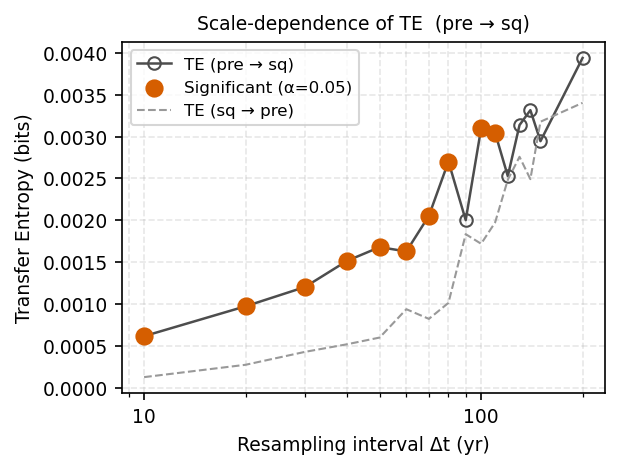

In [2]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,140,150, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_ch4,                 # your raw sq-series
    dt_steps,
    forcing_bins=6, sq_bins=2,
    n_surr=10000, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


     dt     te_xy   p_xy     te_yx   p_yx  sig_uni
0    10  0.000426  0.000  0.000151  0.410     True
1    20  0.000689  0.000  0.000346  0.340     True
2    30  0.000673  0.135  0.000434  0.490    False
3    40  0.000916  0.110  0.000679  0.290    False
4    50  0.000838  0.410  0.000653  0.580    False
5    60  0.000987  0.470  0.000937  0.400    False
6    70  0.001111  0.430  0.000964  0.445    False
7    80  0.001372  0.360  0.001226  0.385    False
8    90  0.001511  0.375  0.001559  0.225    False
9   100  0.001501  0.500  0.001460  0.365    False
10  110  0.001436  0.730  0.001660  0.360    False
11  120  0.001714  0.620  0.001716  0.360    False
12  130  0.002376  0.280  0.001887  0.380    False
13  140  0.002331  0.455  0.002457  0.200    False
14  150  0.002624  0.345  0.001325  0.790    False
15  200  0.002619  0.685  0.003176  0.320    False


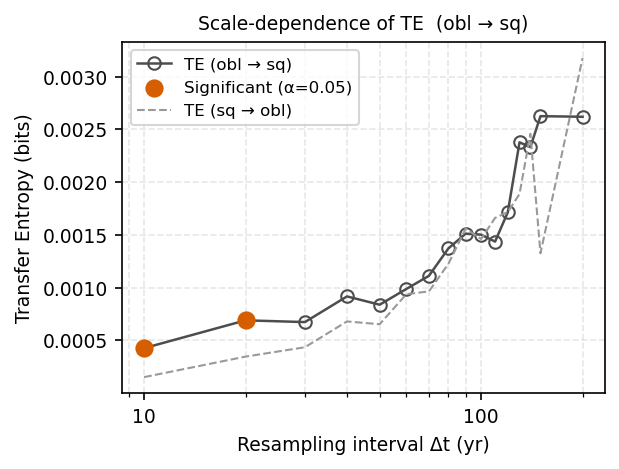

In [3]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


dt_steps = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,110,120,130,140,150, 200]          # yr

# run the scan
te_df, (fig, ax) = sa.te_vs_dt_scan(
    df_filt_ch4,                 # your raw sq-series
    dt_steps,
    forcing='obl',
    forcing_bins=6, sq_bins=2,
    n_surr=200, alpha=0.05,
    sq_method='hist',            # or 'quantile', 'kmeans'
    dpi=150)

# te_df now holds the numbers:
print(te_df)


# TE from pre and obl to CH4 MCV (dt=10)

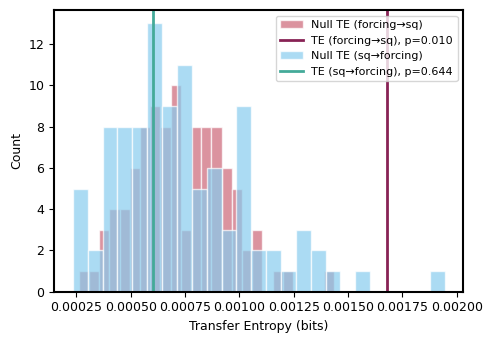

True


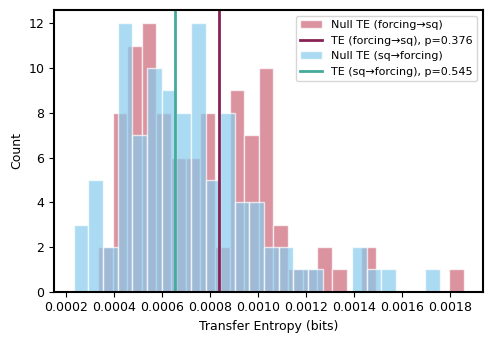

False


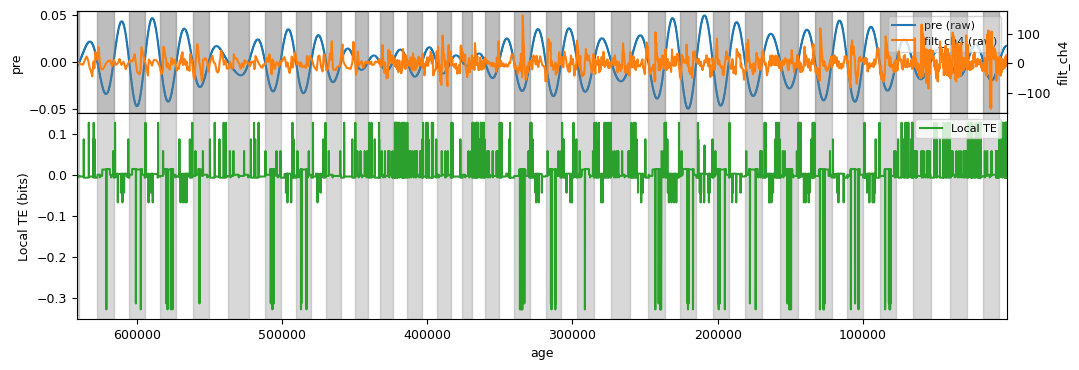

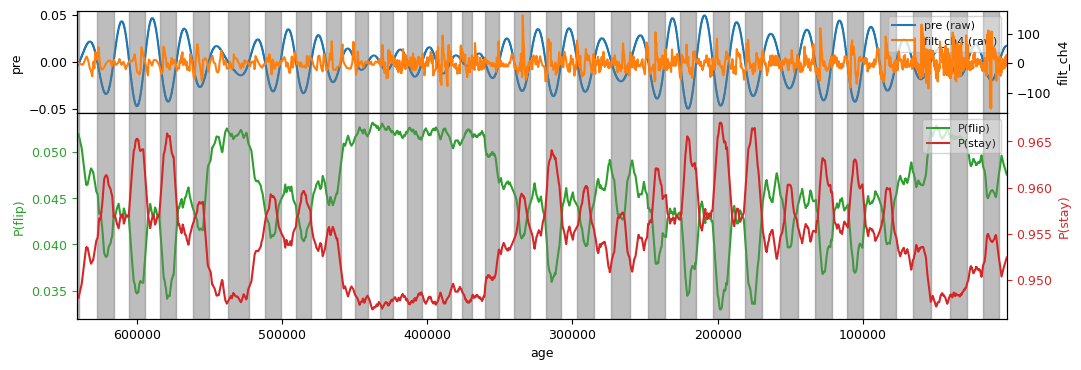

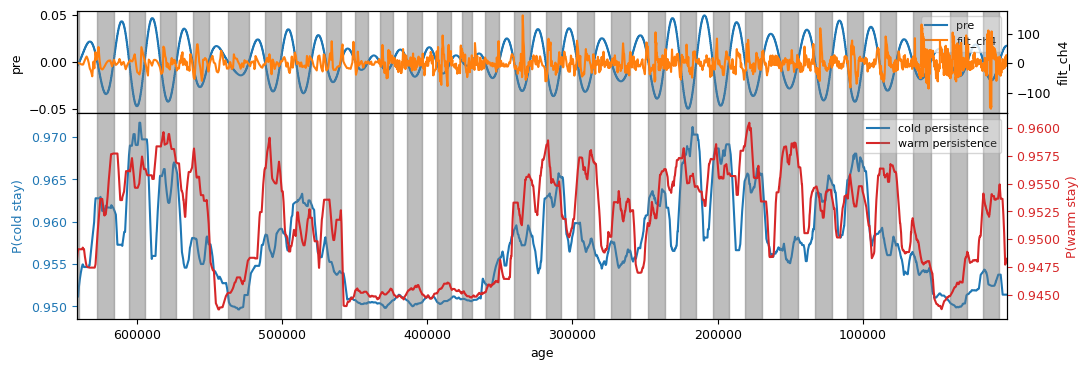

In [49]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 50, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)


LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




# LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=4,
#                    nbins_target=2)



Lp = sa.local_prob(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)




# Lp = sa.local_prob(df_obl_i.copy(), df_sq_i.copy(),
#                    forcing_column='obl',
#                    target_column='filt_ch4',
#                    time_column='age',
#                    nbins_pre=6,
#                    smooth_win=300)


Lp = sa.local_stay_split(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=6,
                   smooth_win=300)

# sq wave ana

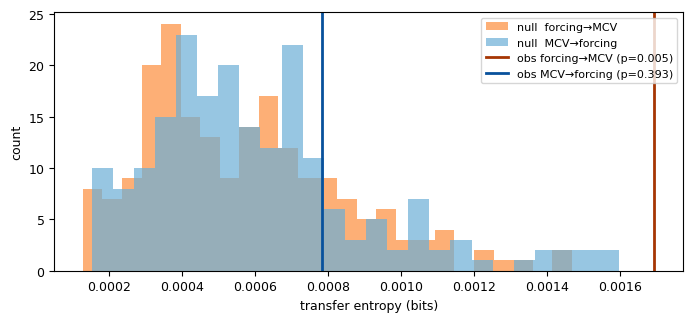

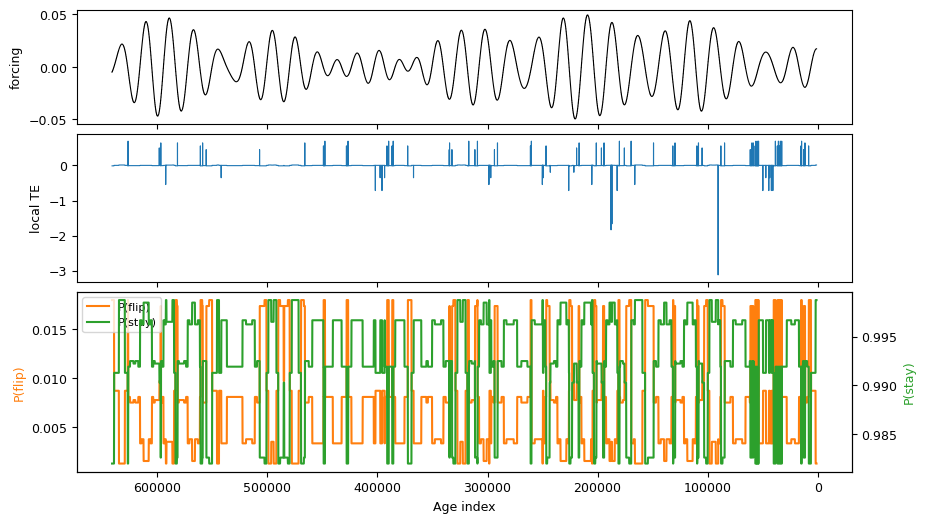

In [11]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


results=sa.thre_data_ana(forcing=pre,sq=sq, 
                         ages=np.flipud(df_sq_i['age'].values),
                            bins_pre       = 6,
                            sigma_mult     = 1.5,
                            n_surr         = 200,)

# TE change with time

# Where the TE comes from

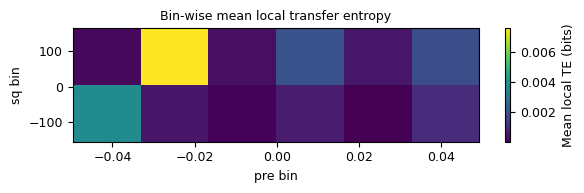

In [83]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


te_grid=sa.heatmap_binwise_local_te(
        pre=pre, sq=sq,
        pre_bins=6, sq_bins=2)

# te_grid=sa.heatmap_binwise_local_te(
#         pre=obl, sq=sq,
#         pre_bins=6, sq_bins=2)

# Frequency domain TE

max-power row = 55   →  period ≈ 23.1 ka


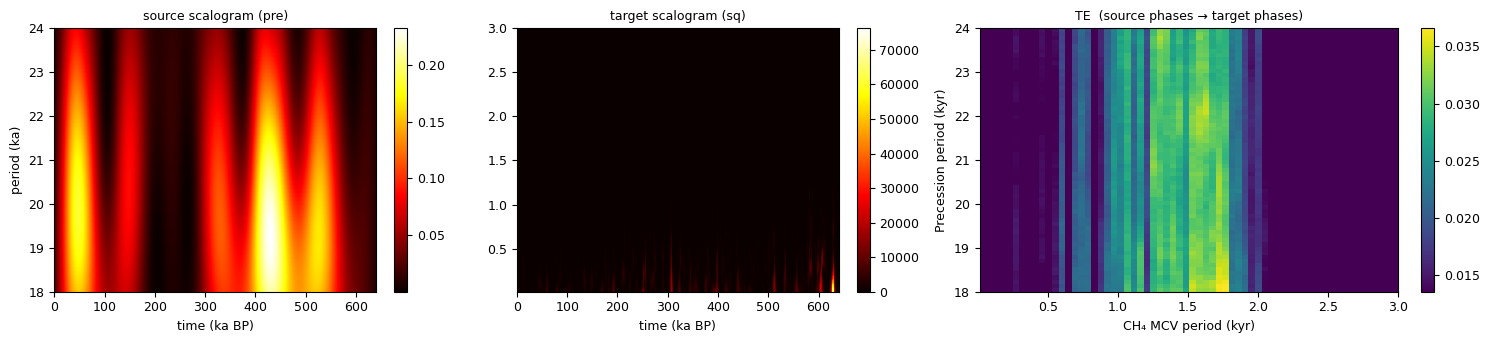

[[0.00569126 0.00095286 0.00072631 ... 0.00629702 0.00345999 0.00331461]
 [0.0058401  0.00091749 0.00069113 ... 0.00624894 0.00349752 0.0033586 ]
 [0.00583612 0.00091324 0.00068649 ... 0.00627016 0.00347507 0.00330846]
 ...
 [0.00567161 0.00141199 0.00116386 ... 0.00556794 0.00350084 0.00285287]
 [0.0054582  0.00123808 0.00098702 ... 0.00556616 0.00380018 0.00303109]
 [0.00538214 0.00116165 0.00091012 ... 0.00554787 0.00378224 0.00320472]]


In [50]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

te_mat, p_src, p_trg = sa.freq_resolved_te(
    x = pre,             # forcing   (chronological order!)
    y = sq,              # response
    sampling_period = 50,     # yr/pt
    # source band: narrow around 20 ka
    src_min_period = 18_000,
    src_max_period = 24_000,
    n_src_scales   = 64,
    # target band: 0.1–3 ka
    trg_min_period = 10,
    trg_max_period = 3_000,
    n_trg_scales   = 64,
    k = 1,
    plot = True,
    source_vname='Precession',       # e.g. 'pre'
    target_vname='CH₄ MCV'        # e.g. 'sq'
)
print(te_mat)

max-power row = 50   →  period ≈ 22.62 ka


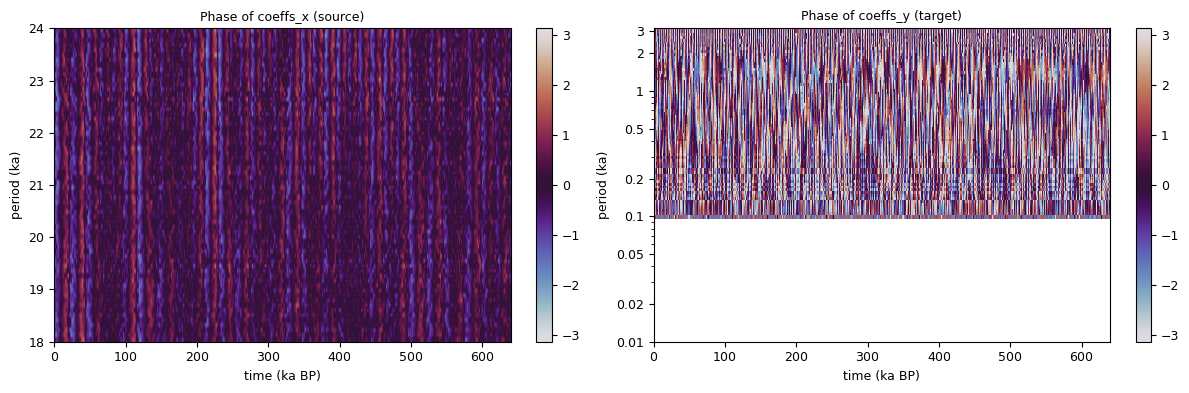

In [68]:
import numpy as np
import pywt, matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1 · parameters
# ------------------------------------------------------------------
wavelet          = 'cmor1.5-1.0'
sampling_period  = 50            # yr per sample  (→ 0.05 ka)

# source (forcing) band: 18–24 ka
src_min_period   = 18_000        # yr
src_max_period   = 24_000
n_src_scales     = 64

# target (response) band: 0.01–3 ka
trg_min_period   = 100            # yr
trg_max_period   = 3_000
n_trg_scales     = 64

# ------------------------------------------------------------------
# 2 · synthetic example data (replace with your pre, sq series)
# ------------------------------------------------------------------
N   = 12_806                       # same as your example
pre = np.random.randn(N)           # forcing  (dummy)
sq  = np.random.randn(N)           # response (dummy)

x = pre[::-1].copy()               # oldest sample first
y = sq[::-1].copy()

# ------------------------------------------------------------------
# 3 · helper to turn periods → scales
# ------------------------------------------------------------------
fc = pywt.central_frequency(wavelet)

def build_scales(min_p, max_p, n_sc):
    if np.isclose(min_p, max_p):
        ctr      = min_p
        periods  = ctr * np.geomspace(0.8, 1.2, n_sc)
    else:
        periods  = np.geomspace(min_p, max_p, n_sc)
    scales = periods * fc / sampling_period
    return periods, scales

periods_x, scales_x = build_scales(src_min_period, src_max_period, n_src_scales)
periods_y, scales_y = build_scales(trg_min_period, trg_max_period, n_trg_scales)

# ------------------------------------------------------------------
# 4 · continuous wavelet transforms → phase
# ------------------------------------------------------------------
coeffs_x, _ = pywt.cwt(x, scales_x, wavelet, sampling_period=sampling_period)
coeffs_y, _ = pywt.cwt(y, scales_y, wavelet, sampling_period=sampling_period)

phase_x = np.angle(coeffs_x)       # shape (64, N)
phase_y = np.angle(coeffs_y)       # shape (64, N)

# ------------------------------------------------------------------
# 5 · diagnostic printout (unchanged)
# ------------------------------------------------------------------
row_max = (np.abs(coeffs_x)**2).mean(axis=1).argmax()
print(f"max-power row = {row_max}   →  period ≈ {periods_x[row_max]/1000:.2f} ka")

# ------------------------------------------------------------------
# 6 · BUILD PERIOD & TIME EDGES FOR PCOLORMESH
# ------------------------------------------------------------------
# --- period edges (log-spaced) ------------------------------------
edges_p = np.empty(periods_y.size + 1)
edges_p[1:-1] = np.sqrt(periods_y[:-1] * periods_y[1:])    # geometric mean
edges_p[0]    = periods_y[0]**2 / periods_y[1]             # extra low edge
edges_p[-1]   = periods_y[-1]**2 / periods_y[-2]           # extra high edge
edges_p /= 1000.0                                          # yr → ka

# --- time centres and edges (linear) ------------------------------
t_ka   = np.arange(x.size) * sampling_period / 1000.0       # centres, shape (N,)
dt_ka  = sampling_period / 1000.0
edges_t = np.concatenate(([t_ka[0] - dt_ka / 2],
                          t_ka + dt_ka / 2))                # shape (N+1,)

# --- 2-D grids for pcolormesh -------------------------------------
T, P = np.meshgrid(edges_t, edges_p)   # both (65, N+1)

# ------------------------------------------------------------------
# 7 · PLOT: left = source (plain imshow); right = target (log-y pcolormesh)
# ------------------------------------------------------------------
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios': [1, 1]})

# ---- left panel: source ------------------------------------------
extent_src = [t_ka[0], t_ka[-1], periods_x[0]/1000, periods_x[-1]/1000]
im0 = ax[0].imshow(phase_x, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_src,
                   vmin=-np.pi, vmax=np.pi)
ax[0].set_title('Phase of coeffs_x (source)')
ax[0].set_xlabel('time (ka BP)')
ax[0].set_ylabel('period (ka)')
plt.colorbar(im0, ax=ax[0], fraction=0.046)

# ---- right panel: target (log-y, pcolormesh) ----------------------
im1 = ax[1].pcolormesh(T, P, phase_y,
                       cmap='twilight', shading='flat',
                       vmin=-np.pi, vmax=np.pi)
ax[1].set_yscale('log')
# ax[1].invert_yaxis()                       # short periods at top
ax[1].set_title('Phase of coeffs_y (target)')
ax[1].set_xlabel('time (ka BP)')
ax[1].set_ylabel('period (ka)')

# --- NEW: put period ticks explicitly in ka -----------------------
period_ticks = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 3])
ax[1].set_yticks(period_ticks)
ax[1].set_yticklabels([f'{p:g}' for p in period_ticks])

plt.colorbar(im1, ax=ax[1], fraction=0.046)

plt.tight_layout()
plt.show()


In [ ]:

wavelet          = 'cmor1.5-1.0'
sampling_period  = 50            # yr per sample (→ 0.05 ka on the x-axis)

# --- source (forcing) band: 18–24 ka  -------------------------------
src_min_period   = 18_000        # yr
src_max_period   = 24_000
n_src_scales     = 64

# --- target (response) band: 0.01–3 ka  ----------------------------
trg_min_period   = 10            # yr
trg_max_period   = 3_000
n_trg_scales     = 64

# ---------------------------------------------------------------------
# 2. data  – IMPORTANT: the function reverses time, so we do the same
# ---------------------------------------------------------------------
x = pre[::-1].copy()             # forcing, oldest sample first
y = sq[::-1].copy()              # response

# ---------------------------------------------------------------------
# 3. helper to turn periods → scales  (identical to the function code)
# ---------------------------------------------------------------------
import numpy as np, pywt, matplotlib.pyplot as plt

fc = pywt.central_frequency(wavelet)          # wavelet’s centre freq

def build_scales(min_p, max_p, n_sc):
    if np.isclose(min_p, max_p):              # “single” band → 3-ish neighbours
        ctr      = min_p
        periods  = ctr * np.geomspace(0.8, 1.2, n_sc)
    else:                                     # log-space band
        periods  = np.geomspace(min_p, max_p, n_sc)
    scales = periods * fc / sampling_period   # ➜ pywt scale formula
    return periods, scales

periods_x, scales_x = build_scales(src_min_period, src_max_period, n_src_scales)
periods_y, scales_y = build_scales(trg_min_period, trg_max_period, n_trg_scales)

# ---------------------------------------------------------------------
# 4. continuous wavelet transforms
# ---------------------------------------------------------------------
coeffs_x, _ = pywt.cwt(x, scales_x, wavelet, sampling_period=sampling_period)
coeffs_y, _ = pywt.cwt(y, scales_y, wavelet, sampling_period=sampling_period)

phase_x = np.angle(coeffs_x)       # shape (n_src_scales, N)
phase_y = np.angle(coeffs_y)       # shape (n_trg_scales, N)

# ---------------------------------------------------------------------
# 5. quick diagnostic: which source period carries the most power?
#    (duplicates the print-statement in the original)
# ---------------------------------------------------------------------
row_max = (np.abs(coeffs_x)**2).mean(axis=1).argmax()
print(f"max-power row = {row_max}   →  period ≈ {periods_x[row_max]/1000:.2f} ka")

# ---------------------------------------------------------------------
# 6. plot phase (“angle scalogram”) for x and y
# ---------------------------------------------------------------------
t_ka = np.arange(x.size) * sampling_period / 1000    # time axis in kyr BP

extent_src = [t_ka[0], t_ka[-1], periods_x[0]/1000, periods_x[-1]/1000]
extent_trg = [t_ka[0], t_ka[-1], periods_y[0]/1000, periods_y[-1]/1000]

fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios':[1,1]})

im0 = ax[0].imshow(phase_x, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_src)
ax[0].set_title('Phase of coeffs_x (source)')
ax[0].set_xlabel('time (ka BP)')
ax[0].set_ylabel('period (ka)')
plt.colorbar(im0, ax=ax[0], fraction=0.046)

im1 = ax[1].imshow(phase_y, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_trg)
ax[1].set_title('Phase of coeffs_y (target)')
ax[1].set_xlabel('time (ka BP)')
plt.colorbar(im1, ax=ax[1], fraction=0.046)

plt.tight_layout()
plt.show()


max-power row = 55   →  period ≈ 23.14 ka


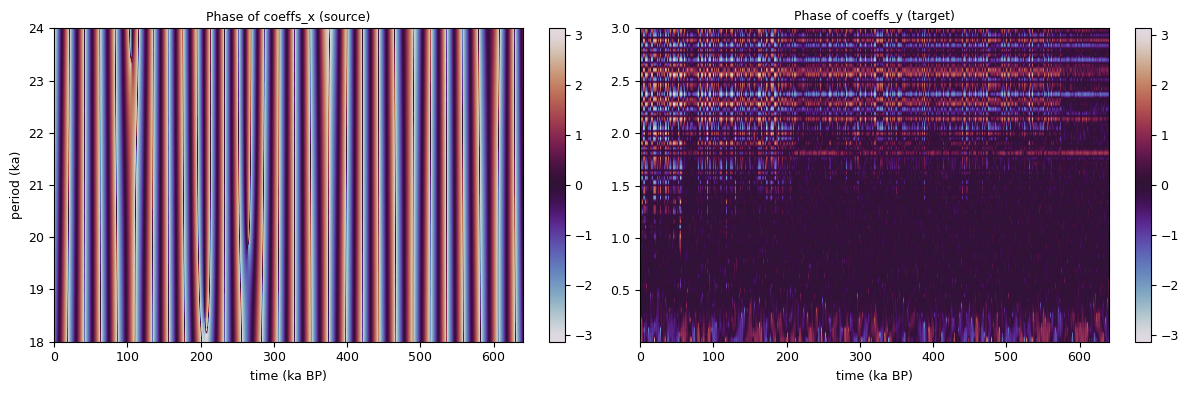

In [60]:

wavelet          = 'cmor1.5-1.0'
sampling_period  = 50            # yr per sample (→ 0.05 ka on the x-axis)

# --- source (forcing) band: 18–24 ka  -------------------------------
src_min_period   = 18_000        # yr
src_max_period   = 24_000
n_src_scales     = 64

# --- target (response) band: 0.01–3 ka  ----------------------------
trg_min_period   = 10            # yr
trg_max_period   = 3_000
n_trg_scales     = 64

# ---------------------------------------------------------------------
# 2. data  – IMPORTANT: the function reverses time, so we do the same
# ---------------------------------------------------------------------
x = pre[::-1].copy()             # forcing, oldest sample first
y = sq[::-1].copy()              # response

# ---------------------------------------------------------------------
# 3. helper to turn periods → scales  (identical to the function code)
# ---------------------------------------------------------------------
import numpy as np, pywt, matplotlib.pyplot as plt

fc = pywt.central_frequency(wavelet)          # wavelet’s centre freq

def build_scales(min_p, max_p, n_sc):
    if np.isclose(min_p, max_p):              # “single” band → 3-ish neighbours
        ctr      = min_p
        periods  = ctr * np.geomspace(0.8, 1.2, n_sc)
    else:                                     # log-space band
        periods  = np.geomspace(min_p, max_p, n_sc)
    scales = periods * fc / sampling_period   # ➜ pywt scale formula
    return periods, scales

periods_x, scales_x = build_scales(src_min_period, src_max_period, n_src_scales)
periods_y, scales_y = build_scales(trg_min_period, trg_max_period, n_trg_scales)

# ---------------------------------------------------------------------
# 4. continuous wavelet transforms
# ---------------------------------------------------------------------
coeffs_x, _ = pywt.cwt(x, scales_x, wavelet, sampling_period=sampling_period)
coeffs_y, _ = pywt.cwt(y, scales_y, wavelet, sampling_period=sampling_period)

phase_x = np.angle(coeffs_x)       # shape (n_src_scales, N)
phase_y = np.angle(coeffs_y)       # shape (n_trg_scales, N)

# ---------------------------------------------------------------------
# 5. quick diagnostic: which source period carries the most power?
#    (duplicates the print-statement in the original)
# ---------------------------------------------------------------------
row_max = (np.abs(coeffs_x)**2).mean(axis=1).argmax()
print(f"max-power row = {row_max}   →  period ≈ {periods_x[row_max]/1000:.2f} ka")

# ---------------------------------------------------------------------
# 6. plot phase (“angle scalogram”) for x and y
# ---------------------------------------------------------------------
t_ka = np.arange(x.size) * sampling_period / 1000    # time axis in kyr BP

extent_src = [t_ka[0], t_ka[-1], periods_x[0]/1000, periods_x[-1]/1000]
extent_trg = [t_ka[0], t_ka[-1], periods_y[0]/1000, periods_y[-1]/1000]

fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios':[1,1]})

im0 = ax[0].imshow(phase_x, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_src)
ax[0].set_title('Phase of coeffs_x (source)')
ax[0].set_xlabel('time (ka BP)')
ax[0].set_ylabel('period (ka)')
plt.colorbar(im0, ax=ax[0], fraction=0.046)

im1 = ax[1].imshow(phase_y, origin='upper', aspect='auto',
                   cmap='twilight', extent=extent_trg)
ax[1].set_title('Phase of coeffs_y (target)')
ax[1].set_xlabel('time (ka BP)')
plt.colorbar(im1, ax=ax[1], fraction=0.046)

plt.tight_layout()
plt.show()


[[-1.28336373 -1.19406432 -1.19742234 ... -1.27940351  2.07824722
   1.98011866]
 [-2.20486315 -2.20622505 -2.20617592 ... -2.20491671  0.933562
   0.93492278]
 [ 2.62933666  2.62928188  2.62928353 ...  2.62933179 -0.51235745
  -0.51233046]
 ...
 [-0.08449517  0.04410879  0.16329723 ...  1.14314808  1.22236106
   1.2635434 ]
 [ 0.47858848  0.59709262  0.71198368 ...  0.83336719  0.93406249
   1.0846353 ]
 [ 1.14477736  1.24109855  1.3367012  ...  0.50851031  0.69057392
   0.7597728 ]]
[1.10708394 0.99625398 0.99516356 1.00016201 1.37058781 1.44890329
 1.18402765 1.02864625 1.51058747 1.67064692 1.13396453 1.99966941
 1.78718119 1.11805322 2.18450793 2.1299639  1.931381   1.44127693
 1.75925097 2.19378793 2.38165332 2.4629485  2.79462924 2.8174859
 2.65707465 2.58817368 2.98027176 2.93656634 2.94750339 2.96676858
 2.97938884 2.96989403 2.98927427 2.99555949 2.99043313 2.99696635
 2.99910133 2.99809574 2.99980721 2.99988757 2.99993625 2.99981085
 2.99975367 2.99990209 2.99985053 2.999923

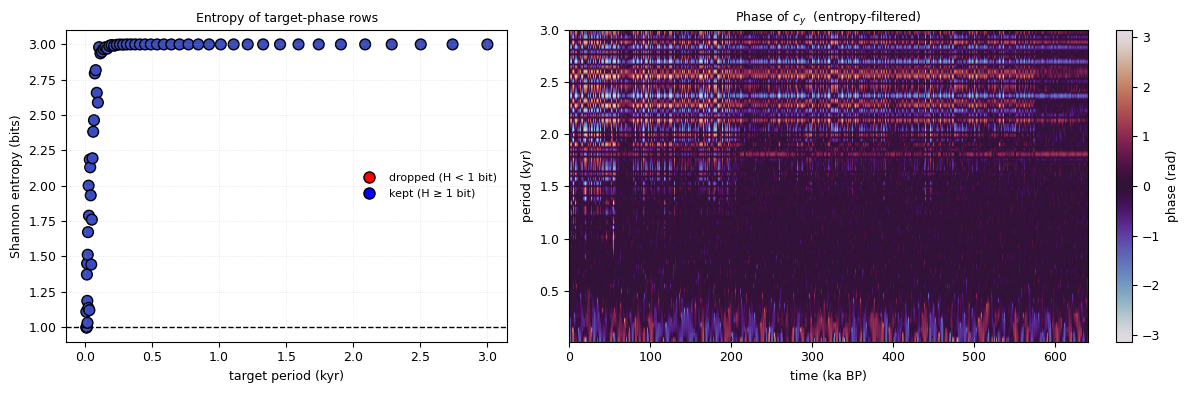

In [64]:
import matplotlib.pyplot as plt
import numpy as np


# bins = linspace(-π, π, 9)#
bins = np.linspace(-np.pi, np.pi, 9)  # 8 bins for phase discretization
phase_y  = np.angle(coeffs_y)         # (n_trg_scales, N)
disc_y   = np.digitize(phase_y, bins) - 1

print(phase_y)

# Shannon entropy per target scale (bits)
from scipy.stats import entropy
H_y = np.array([entropy(np.bincount(row, minlength=8), base=2)
                for row in disc_y])

print(H_y)

# # Threshold: retain rows with at least 1 bit of entropy
good = H_y > 0
# coeffs_y  = coeffs_y[good]
# disc_y    = disc_y[good]
# periods_y = periods_y[good]


fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       gridspec_kw={'width_ratios': [1, 1.3]})

# x-axis: target period in kyr; use the *pre-mask* periods so the dots
# line up with the mask
ax[0].scatter(periods_y / 1000, H_y, c=good,
              cmap='coolwarm', edgecolor='k', s=60)
ax[0].axhline(1.0, ls='--', lw=1, color='k')
ax[0].set_xlabel('target period (kyr)')
ax[0].set_ylabel('Shannon entropy (bits)')
ax[0].set_title('Entropy of target-phase rows')
# ax[0].invert_xaxis()          # optional: long periods on the left
ax[0].grid(True, ls=':', lw=.5)
ax[0].legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red',
               label='dropped (H < 1 bit)', markersize=8, markeredgecolor='k'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
               label='kept (H ≥ 1 bit)', markersize=8, markeredgecolor='k')
], frameon=False)

# ---------------------------------------------------------------
# 2.  Phase scalogram  (only the “good” rows)
# ---------------------------------------------------------------
# build an extent that maps rows to periods (kyr) and columns to time (ka BP)
t_ka = np.arange(phase_y.shape[1]) * sampling_period / 1000
extent = [t_ka[0], t_ka[-1],           # x-axis: time
          periods_y[good][0] / 1000,   # y-axis: long → short
          periods_y[good][-1] / 1000]

im = ax[1].imshow(phase_y[good], origin='upper', aspect='auto',
                  cmap='twilight', extent=extent)
ax[1].set_title('Phase of $c_{y}$  (entropy-filtered)')
ax[1].set_xlabel('time (ka BP)')
ax[1].set_ylabel('period (kyr)')
plt.colorbar(im, ax=ax[1], fraction=.046, label='phase (rad)')

plt.tight_layout()
plt.show()


In [47]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# te_mat, p_src, p_trg = sa.freq_resolved_te(
#     x = obl,             # forcing   (chronological order!)
#     y = sq,              # response
#     sampling_period = 100,     # yr/pt
#     # source band: narrow around 20 ka
#     src_min_period = 35_000,
#     src_max_period = 50_000,
#     n_src_scales   = 64,
#     # target band: 0.1–3 ka
#     trg_min_period = 10,
#     trg_max_period = 3_000,
#     n_trg_scales   = 64,
#     k = 1,
#     plot = True,
#     source_vname='Obliquity',       # e.g. 'pre'
#     target_vname='CH₄ MCV'        # e.g. 'sq'
# )

# P stay P flip analysis

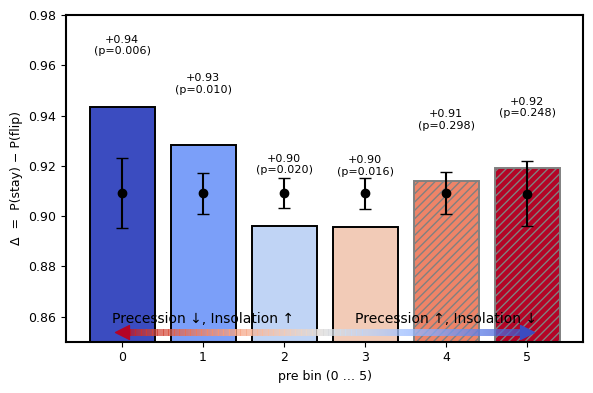

In [9]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
        df_pre_i, df_sq_i,
        forcing_column='pre',
        target_column='filt_ch4',
        nbins_pre=6,
        n_surr=10000,
        alpha=0.05,
        y_min=0.85,
        y_max=0.98,
        random_state=0   # reproducible
)
# print(delta, mu, sigma, p)

# delta, mu, sigma, p = sa.prob_prebins_diffbar_surr(
#         df_obl_i, df_sq_i,
#         forcing_column='obl',
#         target_column='filt_ch4',
#         nbins_pre=6,
#         n_surr=1000,
#         alpha=0.05,
#         random_state=0   # reproducible
# )


# P warm stay and P cold stay

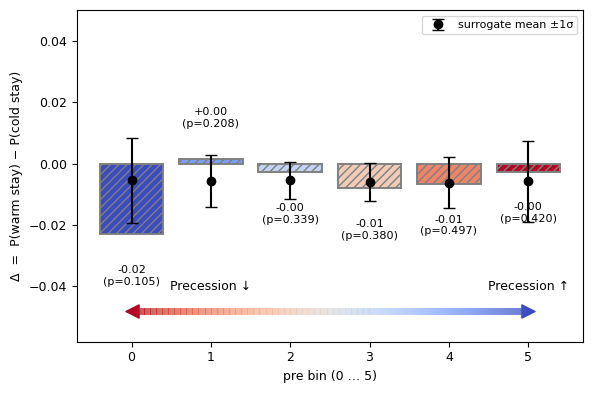

In [101]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
    df_pre      = df_pre_i,
    df_sq       = df_sq_i,
    forcing_column='pre',
    target_column='filt_ch4',
    nbins_pre   = 6,
    n_surr      = 1000,
    alpha       = 0.05,
    random_state=0
)
# delta, mu, sd, p = sa.prob_prebins_staydiff_surr(
#     df_pre      = df_obl_i,
#     df_sq       = df_sq_i,
#     forcing_column='obl',
#     target_column='filt_ch4',
#     nbins_pre   = 6,
#     n_surr      = 1000,
#     alpha       = 0.05,
#     random_state=0
# )

# The following are sensitivity tests

# Bin count

(12806,) (12806,) (12806,)
      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    519   1068   1799   1761   1150    509
sq=1    331   1052   1553   1669    966    429


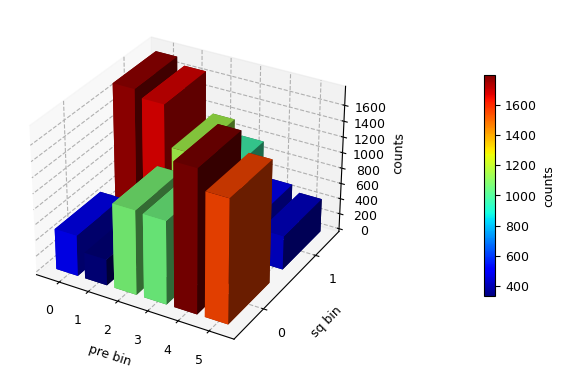

      pre=0  pre=1  pre=2  pre=3  pre=4  pre=5
sq=0    666   1400   1085   1019   1576   1060
sq=1    494   1326   1009    991   1218    962


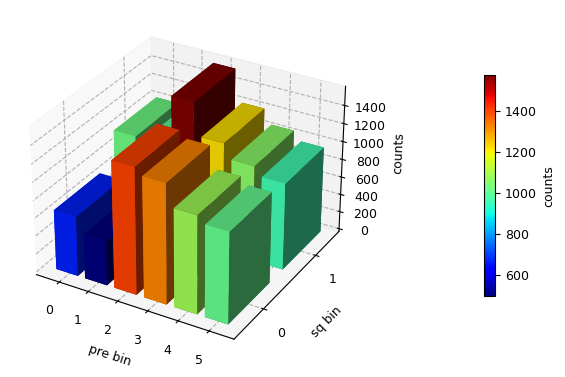

In [102]:
pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)

print(sq.shape, pre.shape, obl.shape)

from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

_ = sa.count_sq_pre_contexts_3d(sq, pre, nbins_pre=6)
_ = sa.count_sq_pre_contexts_3d(sq, obl, nbins_pre=6)

# Influence of noise: test on different pre bin numbers, length of history (k)

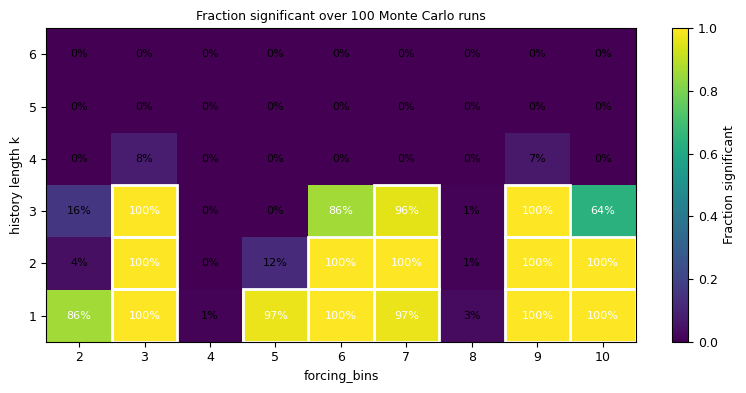

In [16]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)
df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 50, if_plot=False)


fractions= sa.mc_TE_heatmap(
    pre =df_pre_i['pre'].values,
    sq =df_sq_i['filt_ch4'].values,
    niter=100,
    n_surr=100,
    alpha=0.05,
    ks=None,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    plot=True)

In [13]:
# Python ≥3.8
import importlib.metadata as im
print(im.version("pyinform"))



0.2.0


In [66]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
#     df_ch4_interp,          # DataFrame with columns ['age','ch4']
#     df_d18O_interp,         # columns ['age','d18O']
#     cutoff_period = 10000, # high-pass >1/10 ka
#     plot = False             # quick comparison plot
# )
# df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 10, if_plot=False)

# fractions= sa.mc_TE_heatmap(
#     pre =df_obl_i['obl'].values,
#     sq =df_sq_i['filt_ch4'].values,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     ks=None,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     plot=True)

# Influence of noise, test on different dt

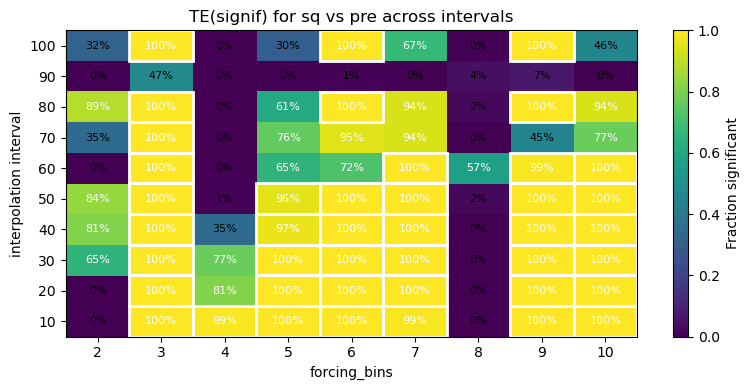

In [ ]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)

df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
    df_ch4_interp,          # DataFrame with columns ['age','ch4']
    df_d18O_interp,         # columns ['age','d18O']
    cutoff_period = 10000, # high-pass >1/10 ka
    plot = False             # quick comparison plot
)

f=sa.mc_TE_heatmap_inter(
    df_filt_ch4.copy(),
    target_column='filt_ch4',
    intervals=None,
    niter=100,
    n_surr=100,
    alpha=0.05,
    k=1,
    gbins=None,
    p_thresh=0.95,
    n_jobs=-1,
    if_plot=False,
    forcing_var='pre',
    plot=True
)

In [65]:
# from toolbox import sq_ana as sa 
# import importlib
# importlib.reload(sa)

# df_filt_ch4, df_filt_d18O = sa.highpass_ch4_d18O(
#     df_ch4_interp,          # DataFrame with columns ['age','ch4']
#     df_d18O_interp,         # columns ['age','d18O']
#     cutoff_period = 10000, # high-pass >1/10 ka
#     plot = False             # quick comparison plot
# )

# f=sa.mc_TE_heatmap_inter(
#     df_filt_ch4,
#     target_column='filt_ch4',
#     intervals=None,
#     niter=100,
#     n_surr=100,
#     alpha=0.05,
#     k=1,
#     gbins=None,
#     p_thresh=0.95,
#     n_jobs=-1,
#     if_plot=False,
#     forcing_var='obl',
#     plot=True
# )

# Influence of age scale uncertainty: random scaling experiment

In [93]:
import numpy as np
from toolbox import sq_ana as sa
import importlib
importlib.reload(sa)

# how many random trials?
N = 100

# your maximum age error (as ratio)
max_age_error = 5800 # the maximum age uncertainty of AICC2023 gas age (Bouchet et al., 2023)
max_age_ratio = max_age_error / np.max(df_filt_ch4['age'].values)

# sigma so that ±2σ = ±max_age_ratio
sigma = max_age_ratio / 2.0

# counters
count_pre_sq = 0
count_obl_sq = 0

for _ in range(N):
    # draw a random ratio, truncated to [-max_age_ratio, +max_age_ratio]
    r = np.random.normal(0, sigma)
    r = np.clip(r, -max_age_ratio, max_age_ratio)
    
    # stretch your age axis
    df_sq_stretch = df_filt_ch4.copy()
    df_sq_stretch['age'] = df_sq_stretch['age'].values * (1.0 + r)
    
    # re-interpolate
    df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(
        df_sq_stretch, 30, if_plot=False
    )
    
    pre = df_pre_i['pre'].values
    obl = df_obl_i['obl'].values
    sq  = df_sq_i['filt_ch4'].values
    
    # test pre → sq
    result_pre, _ = sa.transfer_entropy_surrogate_test(
        pre, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_pre:
        count_pre_sq += 1
    
    # test obl → sq
    result_obl, _ = sa.transfer_entropy_surrogate_test(
        obl, sq, forcing_bins=6, sq_bins=2, if_plot=False
    )
    if result_obl:
        count_obl_sq += 1

# report
print(f"Out of {N} random age-errors:")
print(f"  pre → sq was significant in {count_pre_sq} runs")
print(f"  obl → sq was significant in {count_obl_sq} runs")


Out of 100 random age-errors:
  pre → sq was significant in 86 runs
  obl → sq was significant in 64 runs


# Influence of noise: random thining

In [92]:
import numpy as np
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)


df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)

def convergence_test(x, y, thinning_fractions, **te_kwargs):
    results = []
    N = len(x)
    for frac in thinning_fractions:
        m = int(N * frac)
        idx = np.sort(np.random.choice(N, m, replace=False))
        sig, te = sa.transfer_entropy_surrogate_test(
            x[idx], y[idx], if_plot=False, **te_kwargs
        )
        results.append((frac, sig))
    return results

fractions = np.linspace(0.2,1.0,5)   # 20%, 40%, …100%
print(convergence_test(pre, sq, fractions,
                       forcing_bins=6, sq_bins=2))

print(convergence_test(obl, sq, fractions,
                       forcing_bins=6, sq_bins=2))



[(0.2, False), (0.4, True), (0.6000000000000001, True), (0.8, True), (1.0, True)]
[(0.2, False), (0.4, False), (0.6000000000000001, False), (0.8, False), (1.0, False)]


# The influence of different bining plan ([max-min]/2; median; k-means)

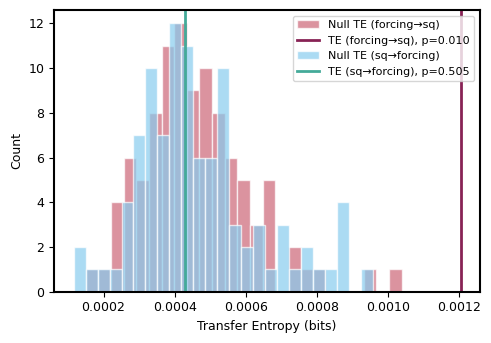

True


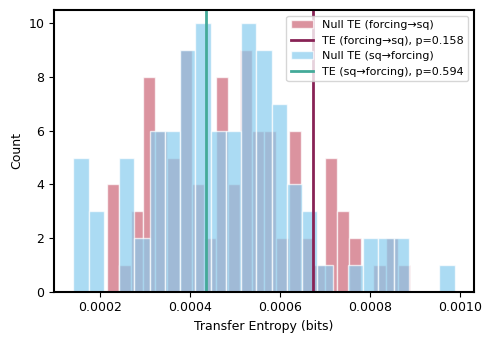

False


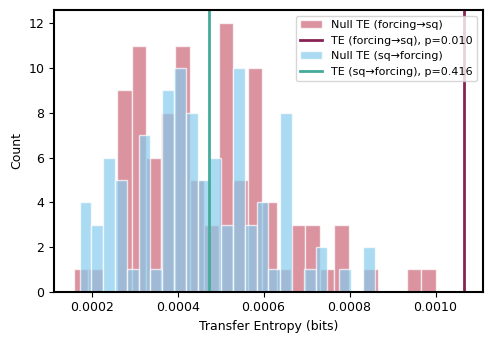

True


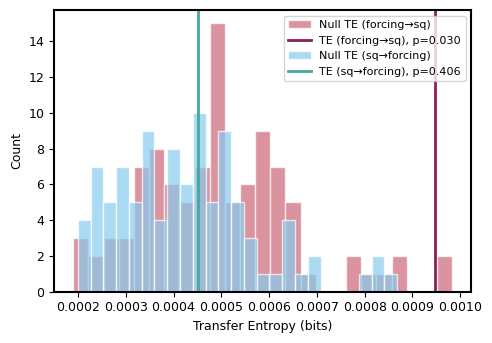

True


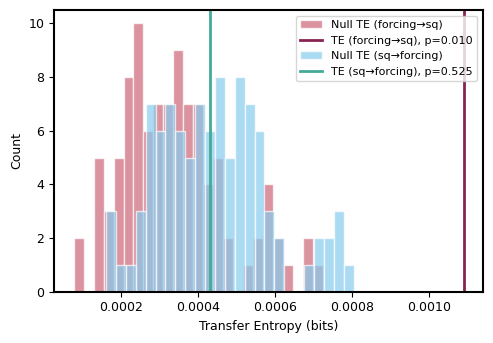

True


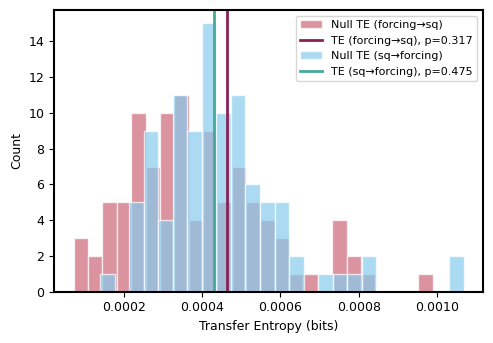

False


In [94]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.interpolate_data_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


# sq_method='hist',  # options: 'hist', 'quantile', 'kmeans'

result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='hist')
print(result)



result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='quantile')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)
result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, sq_method='kmeans')
print(result)

# Influence of "echo" random shift experiment

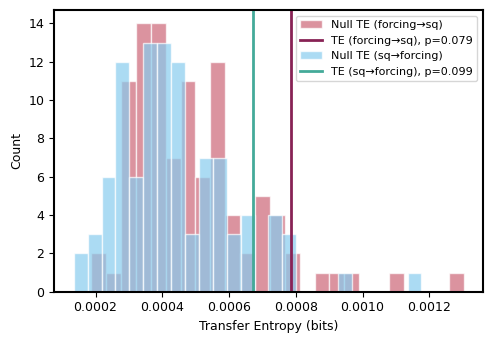

False


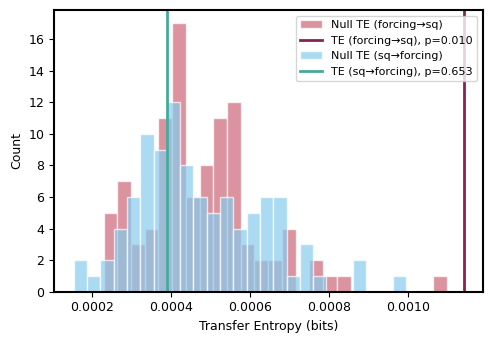

True


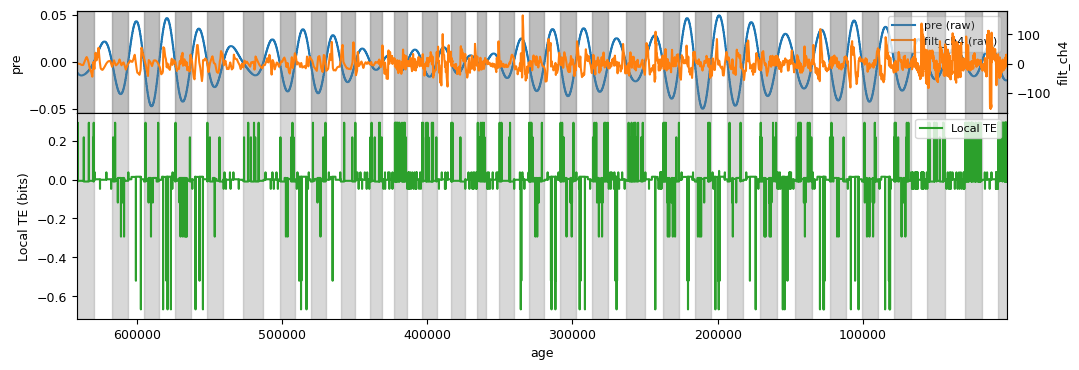

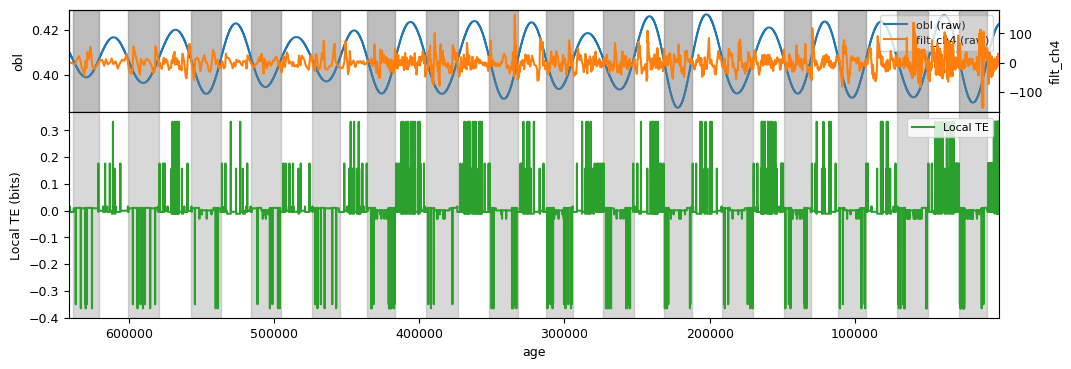

In [95]:
from toolbox import sq_ana as sa 
import importlib
importlib.reload(sa)





df_sq_i, df_pre_i, df_obl_i = sa.create_shift_forcing(df_filt_ch4.copy(), 30, if_plot=False)


pre = df_pre_i['pre'].values      # source (precession)
obl = df_obl_i['obl'].values    # target (obliquity)
sq = df_sq_i['filt_ch4'].values    # target (residual)


result,fig=sa.transfer_entropy_surrogate_test(pre,sq, forcing_bins=6, sq_bins=2, n_surr=100)

# fig.savefig('TE_NGRIP.pdf',format='pdf',bbox_inches='tight')
print(result)


result,fig=sa.transfer_entropy_surrogate_test(obl,sq, forcing_bins=6, sq_bins=2, n_surr=100)
print(result)



LTE = sa.local_TE(df_pre_i.copy(), df_sq_i.copy(),
                   forcing_column='pre',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)




LTE = sa.local_TE(df_obl_i.copy(), df_sq_i.copy(),
                   forcing_column='obl',
                   target_column='filt_ch4',
                   time_column='age',
                   nbins_pre=4,
                   nbins_target=2)

# Some other tests

# Check what the null Pre (random swap) looks like

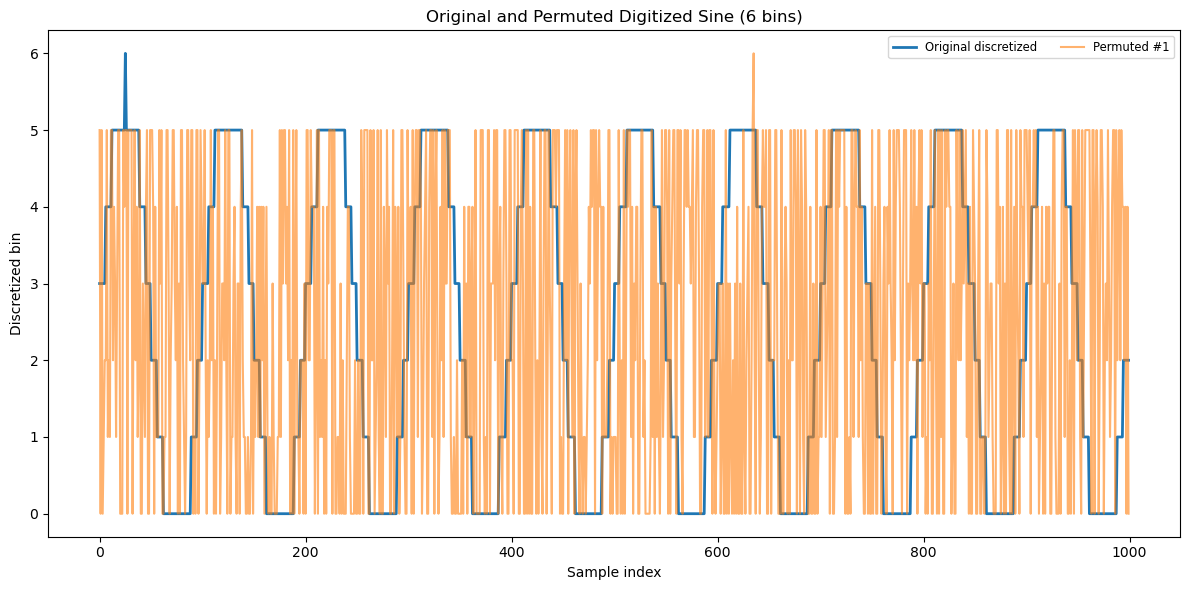

In [439]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a sine wave with 10 cycles
cycles = 10
N = 1000
t = np.linspace(0, cycles * 2 * np.pi, N)
pre = np.sin(t)

# Discretize into 6 bins
edges = np.histogram_bin_edges(pre, bins=6)
pre_disc = np.digitize(pre, edges) - 1

# Generate 10 permuted surrogates
surrogates = [np.random.permutation(pre_disc) for _ in range(10)]

# Plot original and surrogates
plt.figure(figsize=(12, 6))
plt.plot(pre_disc, label='Original discretized', linewidth=2)
for i, s in enumerate(surrogates, 1):
    plt.plot(s, alpha=0.6, label=f'Permuted #{i}')
    if i == 1:
        break
plt.xlabel('Sample index')
plt.ylabel('Discretized bin')
plt.title('Original and Permuted Digitized Sine (6 bins)')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()


# The CH4 bins

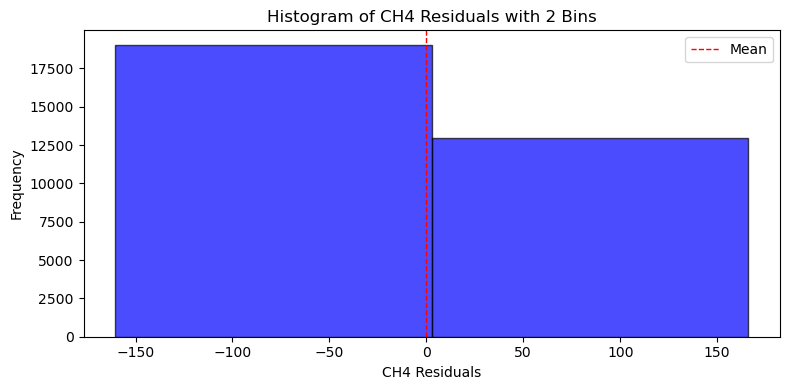

In [ ]:
# plot the histogram of sq with bins=2 
plt.figure(figsize=(8, 4))
plt.hist(sq, bins=2, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of CH4 Residuals with 2 Bins')
plt.xlabel('CH4 Residuals')
plt.ylabel('Frequency')
plt.axvline(np.mean(sq), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.tight_layout()